# EDA, 전처리
## 1.1 분석에 필요한 라이브러리 import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 1.2 데이터를 불러오고 타겟 변수(Outcome)에 속한 값들의 비율과 전체 데이터 앞 7개의 값을 확인

In [2]:
#전체 데이터 앞의 7개의 값 확인 
df = pd.read_csv('./diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [3]:
#outcome 변수에 속한 값의 비율 확인 
count = df['Outcome'].value_counts()
normalize = df['Outcome'].value_counts(normalize=True)
outcome_count = pd.DataFrame({'Count': count, 'Normalize': normalize})
outcome_count

,Count,Normalize
Outcome,,
0,500,0.651042
1,268,0.348958


## 1.3 데이터의 feature 타입과 null 개수 확인 

In [4]:
# df feature 타입 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [6]:
# target 변수 : Outcome 
y = df['Outcome']
X = df.drop(columns=['Outcome'])

## 1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요
- test_size = 0.3
- random_state = 123
- stratify = y

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

## 1.6 test size는 어드 정도로 해야 좋은지 그리고 왜 그래야 하는지?
- test size : 머신러닝을 통해 얻은 학습 결과를 테스트 한다 -> 시험지와 같은 역할
    - 테스트용 데이터가 별도로 존재할 수도 있지만 전체 데이터에서 일부를 테스트 데이터로 지정해서 테스트를 하기도 한다
### 적절한 test size의 크기
- 절대적인 정답은 없음! 
    - 각 프로젝트마다 요구하는 조건이 다르고 데이터의 양이나 종류 자체도 다르기 때문
    - ex) 100만개의 데이터가 있는 경우 1%만 해도 10000개 -> 모델 성능 평가하기에 충분한 양임
- 보통 전체 데이터의 70%를 학습에 사용. 30% 테스트에 사용
#### 결론 : 
비중은 고정된 것이 아니라 전체 데이터의 양에 따라 모델 검증에 충분할 정도로 설명하면 된다~

## 1.7 1.7 stratify 값을 설정하는 이유와 언제 주로 사용?
### stratify의 역할 :
훈련 데이터와 검증 데이터가 원본 데이터셋 클래스 비율을 반영하게 해줌
-> 원래의 데이터 분포와 유사하게 데이터 추출 가능 
### 언제 사용? : 
분류 문제 & 타겟값의 불균형이 심할 때 사용 

# 2. 예측 및 분석
## 2.1.1 성능 평가 함수 만들기 & 2.1.2 confusion matrix 설명
### confusion_matrix : 오차 행렬
   - 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지, 어떤 유형의 예측 오류가 발생하는지 확인 가능 
   - predictive values(가로) actual values(세로)
|confusion_matrix|positive(1)|negative(0)|
|---|---|---|
|positive(1)|TP|FN|
|negative(0)|FP|TN|

        - TN & TP : **실제 값 맞게 예측**
        - FP & FN : **실제 값 다르게 예측**
### accuracy : 정확도
   - 전체 중 모델이 바르게 분류한 비율
   - 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수 (TP & TN ) 
|confusion_matrix|positive(1)|negative(0)|
|---|---|---|
|positive(1)|**TP**|FN|
|negative(0)|FP|**TN**|

### precision : 정밀도 
   - 모델이 positive라 분류한 것 중에 실제 값이 positive인 비율
   - $TP \over TP+FP$

### recall : 재현도
   - 실제값이 positive인 것 중에 모델이 positive라 분류한 비율
   - $TP \over TP + FN$
### F1 Score : 정밀도와 재현도의 조화평균
- $2*precision * recall \over precision + recall$
- 데이터가 불균형 할 때 사용 
### roc_auc
- roc curve : (FPR)거짓인데 참으로 분류한 것에 대한 (TPR)참인데 참으로 분류한 것의 곡선 
- roc auc : roc 곡선 및의 면적을 구한 것
    - 일반적으로 1에 가까울 수록 좋은 수치

In [8]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [9]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)
pred_proba = logistic.predict_proba(X_test)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8433


## 2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.
### solver의 역할:
회귀 계수 최적화 방식 지정
- default='lbfgs'
### 종류 : 
- lbfgs
- liblinear
    - 다차원, 작은 데이터 세트에 효과적
- newton-cg 
    - 정교한 최적화, 대용량에서 속도가 느림
- sag
    - 경사하강법 기반의 최적화 
    - 경사하강법 : 함수의 값이 낮아지는 방향으로 각 독립변수들의 값을 변형시키면서 함수가 최솟값을 갖도록 하는 독립변수의 값을 탐색
        - 함수의 최솟값을 찾아야하는 상황에서 사용됨 
- saga
    - sag와 비슷
    - L1 규제 지원 
    - 희소 다중 로지스틱 회귀에 적합 

* * *
- L1 규제 (Lasso 규제):
L1 규제는 모델의 가중치(weight)를 희소하게 만드는 데 주로 사용됨
-> 즉, 일부 가중치를 정확히 0으로 만들어 특정 기능(feature)을 선택하거나 제거
L1 규제는 손실 함수에 가중치의 절댓값에 비례하는 항을 추가

- L2 규제 (Ridge 규제):
L2 규제는 모델의 가중치를 작게 만들어 과적합을 방지하는 데 사용됨
-> 이는 모든 가중치가 작은 값을 갖도록 함
L2 규제는 손실 함수에 가중치의 제곱에 비례하는 항을 추가

***

## 2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.
### pred : 
각각의 모델의 최종적인 예측값을 출력
- 회귀모델 : 구체적으로 특정 값 출력
- 분류모델 : 확률이 가장 높은 클래스 
### pred_proba :
분류 모델이 각 클래스에 대한 확률을 일일이 출력하는 것 
각 클래스의 확률을 예측하라는 의미 
- 회귀모델에서는 사용불가 

## 2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [10]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

## 2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

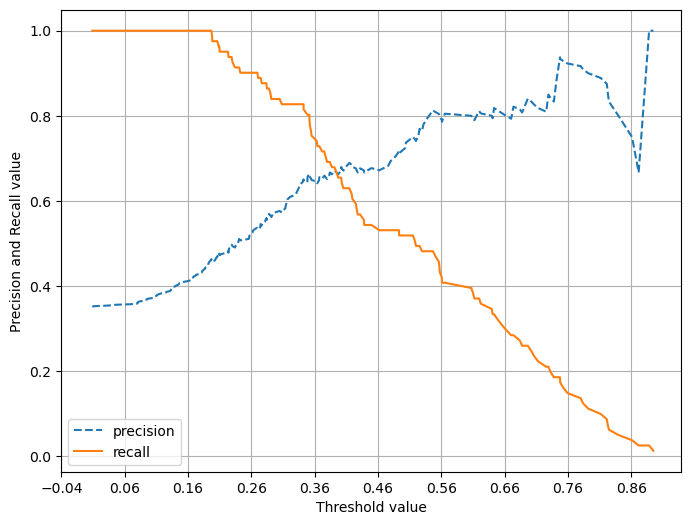

In [11]:
pred_proba_c1 = logistic.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

## 2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [13]:
print(df.min())

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64


Pregnancies을 제외한 feature 평균 값을 대체

In [14]:
outlier = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
df[outlier]=df[outlier].replace(0, df[outlier].mean())

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.9 & 2.10
### feature scaling :
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
### Min-Max Normalization
- 데이터를 일반적으로 0-1 사이의 값으로 변환
- 음수 값이 있으면 -1에서 1 값으로 변환
- $ x-min(x) \over max(x) - min(x) $
- 데이터의 최소값, 최대값을 알 경우 사용
### Standardization
- 기존 변수에 범위를 정규분포로 변환 : 평균이 0 분산이 1
- 상한과 하한이 없음
- 상한과 하한을 정해야 하는 경우가 아니라면 사용
- $ x-\bar x \over \sigma $

In [18]:
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

## 2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [24]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

## 2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [25]:
logistic= LogisticRegression(solver='liblinear')
logistic.fit(x_train_scaled, y_train)
pred = logistic.predict(x_test_scaled)
pred_proba = logistic.predict_proba(x_test_scaled)[:,1]
clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[132  18]
 [ 38  43]]
정확도: 0.7576, 정밀도: 0.7049, 재현율: 0.530864, F1: 0.6056, AUC:0.8584


## 3. 자유 분석

In [48]:
#기준 설정
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train,y_train)
dc.score(X_test,y_test)

0.6493506493506493

In [49]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state = 70)
X_train,X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size =0.3, random_state =123,stratify=y)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accu = accuracy_score(y_test, pred)
print(accu)        

0.7705627705627706


<Axes: >

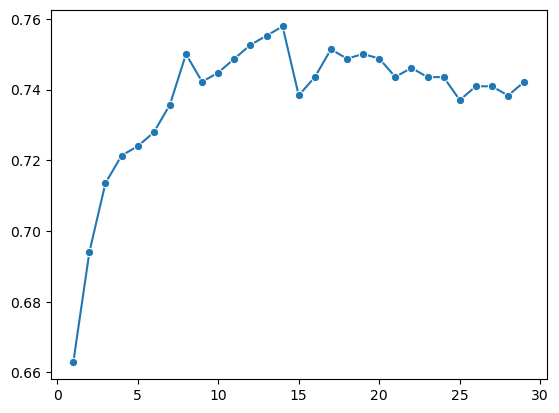

In [57]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
X_train,X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size =0.3, random_state =123,stratify=y)
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

k_values = [i for i in range (1,30)]
scores = []



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')

In [61]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7272727272727273
